In [2]:
#Exploratory Testing 

In [3]:
#Imports

import pandas as pd
import numpy as np
import numpy.random as npr
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from test_regression import *
from sklearn.preprocessing import StandardScaler

R-squared for training data:  0.004253919101987025
[394.28850742 133.44700012 -88.54760248 ... 117.46247047  89.32213243
 -34.59747664]


In [4]:
#Read data
#train = pd.read_csv("train.csv")

#Read data
test_data = pd.read_csv("data/test.csv")
data_train = read_data("train")
sp_encode = encode_data(data_train)
X, y = process_data(data_train, sp_encode, istest=False)
train = pd.DataFrame(X, columns=(data_train.drop("pSat_Pa",axis = 1)).columns)


In [5]:
#SHAPE
print("SHAPE:",data_train.shape)
print("SHAPE:",test_data.shape)

SHAPE: (27147, 27)
SHAPE: (4490, 26)


In [6]:
#MISSING DATA?
print("\nCHECK MISSING DATA:\n\n",data_train.isna().sum())


CHECK MISSING DATA:

 Id                              0
MW                              0
NumOfAtoms                      0
NumOfC                          0
NumOfO                          0
NumOfN                          0
NumHBondDonors                  0
NumOfConf                       0
NumOfConfUsed                   0
parentspecies                   0
C.C..non.aromatic.              0
C.C.C.O.in.non.aromatic.ring    0
hydroxyl..alkyl.                0
aldehyde                        0
ketone                          0
carboxylic.acid                 0
ester                           0
ether..alicyclic.               0
nitrate                         0
nitro                           0
aromatic.hydroxyl               0
carbonylperoxynitrate           0
peroxide                        0
hydroperoxide                   0
carbonylperoxyacid              0
nitroester                      0
pSat_Pa                         0
dtype: int64


In [7]:
#DATA TYPE:
print("DATA TYPE:\n\n",data_train.dtypes)

DATA TYPE:

 Id                                int64
MW                              float64
NumOfAtoms                        int64
NumOfC                            int64
NumOfO                            int64
NumOfN                            int64
NumHBondDonors                    int64
NumOfConf                         int64
NumOfConfUsed                     int64
parentspecies                    object
C.C..non.aromatic.                int64
C.C.C.O.in.non.aromatic.ring      int64
hydroxyl..alkyl.                  int64
aldehyde                          int64
ketone                            int64
carboxylic.acid                   int64
ester                             int64
ether..alicyclic.                 int64
nitrate                           int64
nitro                             int64
aromatic.hydroxyl                 int64
carbonylperoxynitrate             int64
peroxide                          int64
hydroperoxide                     int64
carbonylperoxyacid         

In [8]:
#DESCRIBE DATA:
print("DESCRIBE DATA:")
data_train.describe()

DESCRIBE DATA:


,Id,MW,NumOfAtoms,NumOfC,NumOfO,NumOfN,NumHBondDonors,NumOfConf,NumOfConfUsed,C.C..non.aromatic.,...,ether..alicyclic.,nitrate,nitro,aromatic.hydroxyl,carbonylperoxynitrate,peroxide,hydroperoxide,carbonylperoxyacid,nitroester,pSat_Pa
count,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,...,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,2.714700e+04
mean,74073.347957,264.436315,26.232843,6.860611,9.928390,1.060964,2.201643,229.643386,25.721921,0.092865,...,0.205142,0.665525,0.154050,0.001105,0.241389,0.279663,0.772977,0.259181,0.012451,5.708431e+01
std,47917.611394,49.858355,5.240883,1.451855,2.494574,0.712067,1.018979,202.905589,14.687277,0.290629,...,0.403813,0.673048,0.366171,0.047001,0.451312,0.448842,0.698533,0.467085,0.112537,5.928184e+03
min,0.000000,30.010565,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.624240e-14
25%,31724.500000,232.980781,23.000000,6.000000,8.000000,1.000000,2.000000,72.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659079e-06
50%,69861.000000,266.986260,26.000000,7.000000,10.000000,1.000000,2.000000,174.000000,30.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.552678e-04
75%,113432.000000,299.012475,30.000000,7.000000,12.000000,2.000000,3.000000,331.000000,40.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.974230e-03
max,166420.000000,386.044503,41.000000,10.000000,17.000000,2.000000,6.000000,1743.000000,40.000000,2.000000,...,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,7.324992e+05


In [12]:
#Build a variable for each column:
for column in data_train.columns:
    globals()[column] = data_train[column]

In [13]:
#Drop the target out of the dataset
train_data = train
train_data.head()

,Id,MW,NumOfAtoms,NumOfC,NumOfO,NumOfN,NumHBondDonors,NumOfConf,NumOfConfUsed,parentspecies,...,ester,ether..alicyclic.,nitrate,nitro,aromatic.hydroxyl,carbonylperoxynitrate,peroxide,hydroperoxide,carbonylperoxyacid,nitroester
0,1,74.995643,6,1,3,1,0,1,1,[3.0],...,0,0,0,1,0,0,0,0,0,0
1,2,102.990558,8,2,4,1,0,2,2,[7.0],...,0,0,0,1,0,0,0,0,0,0
2,3,118.985472,9,2,5,1,1,3,1,[7.0],...,0,0,0,1,0,0,0,0,0,0
3,4,134.980387,10,2,6,1,1,3,3,[7.0],...,0,0,0,1,0,0,0,0,1,0
4,5,146.980387,11,3,6,1,1,3,2,[7.0],...,0,0,0,1,0,0,0,0,0,0


In [14]:
#Lets analise our target
pSat_Pa.describe()

count    2.714700e+04
mean     5.708431e+01
std      5.928184e+03
min      1.624240e-14
25%      5.659079e-06
50%      1.552678e-04
75%      3.974230e-03
max      7.324992e+05
Name: pSat_Pa, dtype: float64

C:\Users\André Madaleno\AppData\Local\Temp\ipykernel_21140\395910183.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_train.corr()


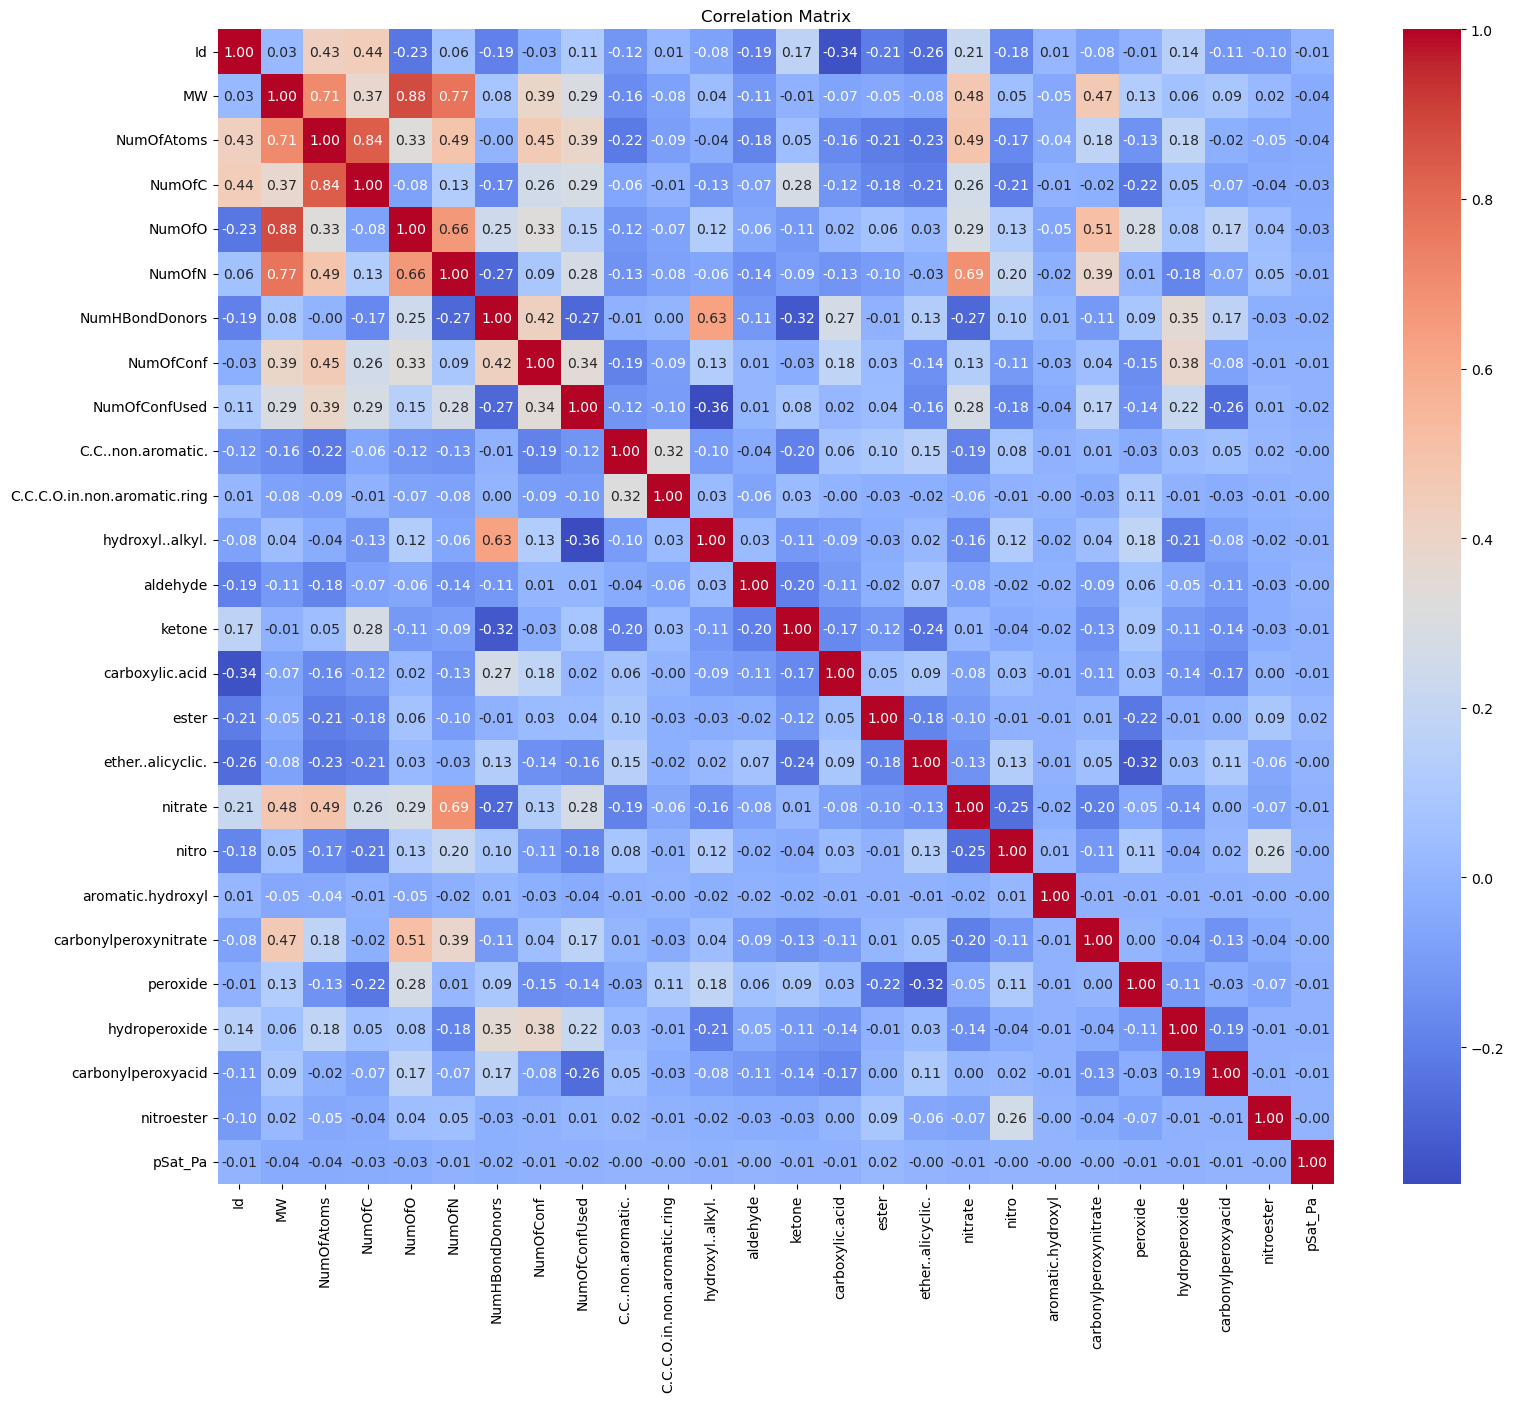

In [15]:
#Correlation Analysis

correlation_matrix = data_train.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


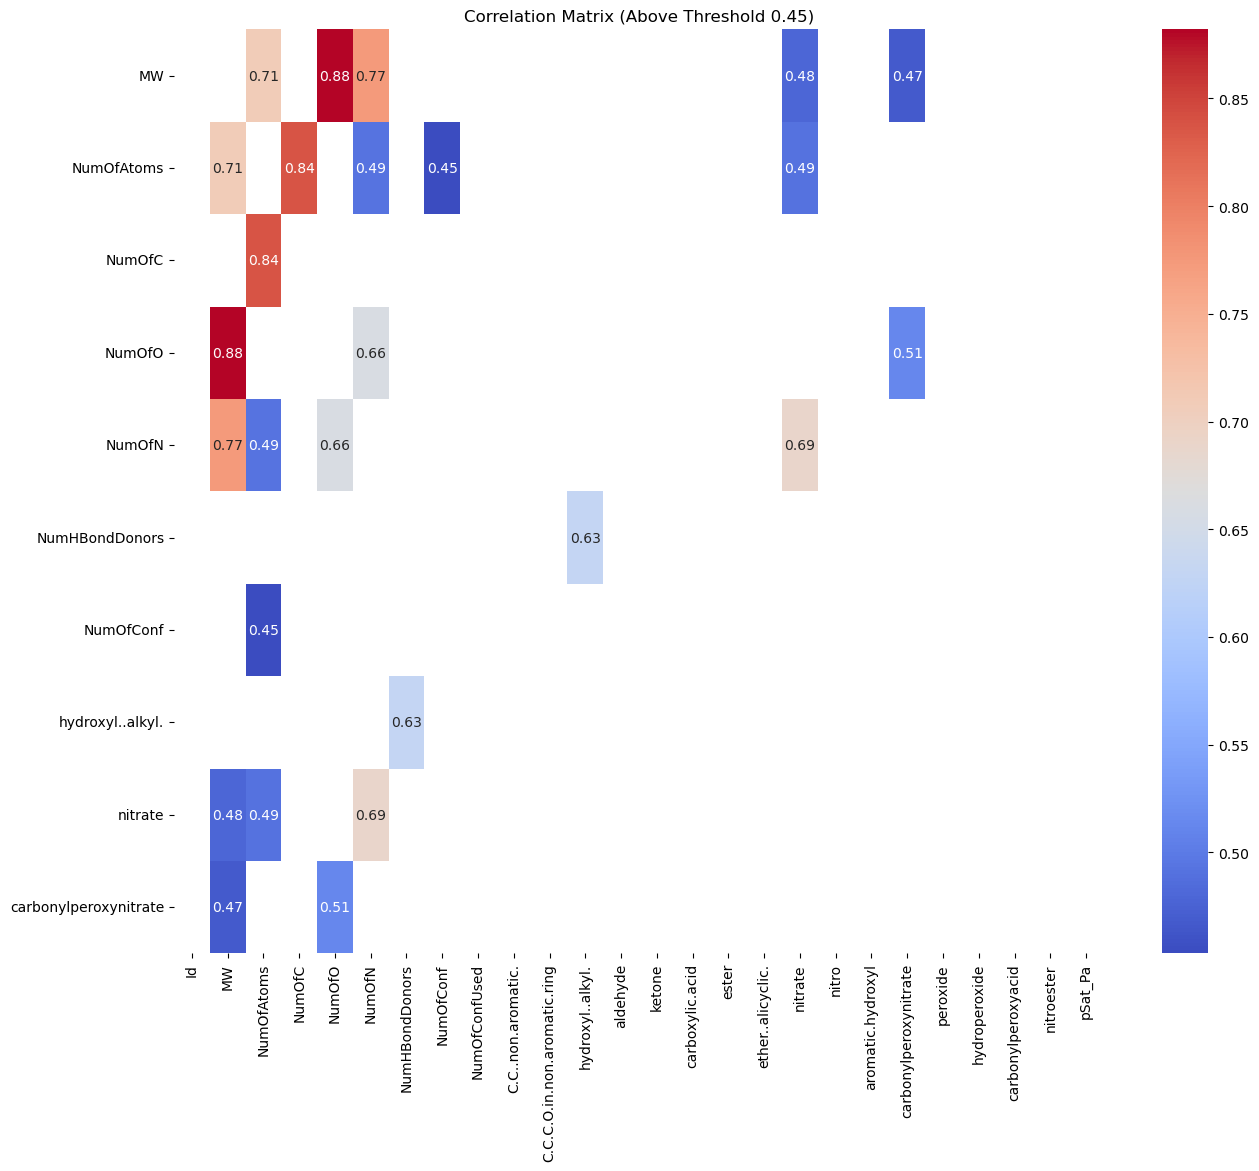

In [16]:
#Check for significant Correlations

threshold = 0.45  # Adjust as needed
highly_correlated_vars = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)
plt.figure(figsize=(15, 12))
sns.heatmap((correlation_matrix[highly_correlated_vars]).dropna(how="all"), annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Correlation Matrix (Above Threshold {threshold})")
plt.show()

Nº of data points above 11: 286


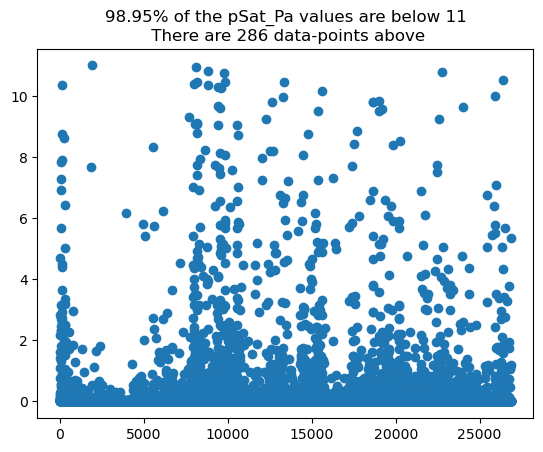

In [17]:
#Check the range of target's data for and outliers

pSat_Pa_list = pSat_Pa.values
#Change the value below to change limit
Check_limit = 11
n = len(pSat_Pa_list)
n_above_limit = len(pSat_Pa_list[pSat_Pa_list>Check_limit])
Percentage_below = 1-(n_above_limit/n)

print(f"Nº of data points above {Check_limit}:",n_above_limit)
plt.scatter(list(range(1, len(pSat_Pa_list[~(pSat_Pa_list>Check_limit)])+1)),pSat_Pa_list[~(pSat_Pa_list>Check_limit)])
plt.title(f"{round(Percentage_below*100,2)}% of the pSat_Pa values are below {Check_limit}\n There are {n_above_limit} data-points above")
plt.show()

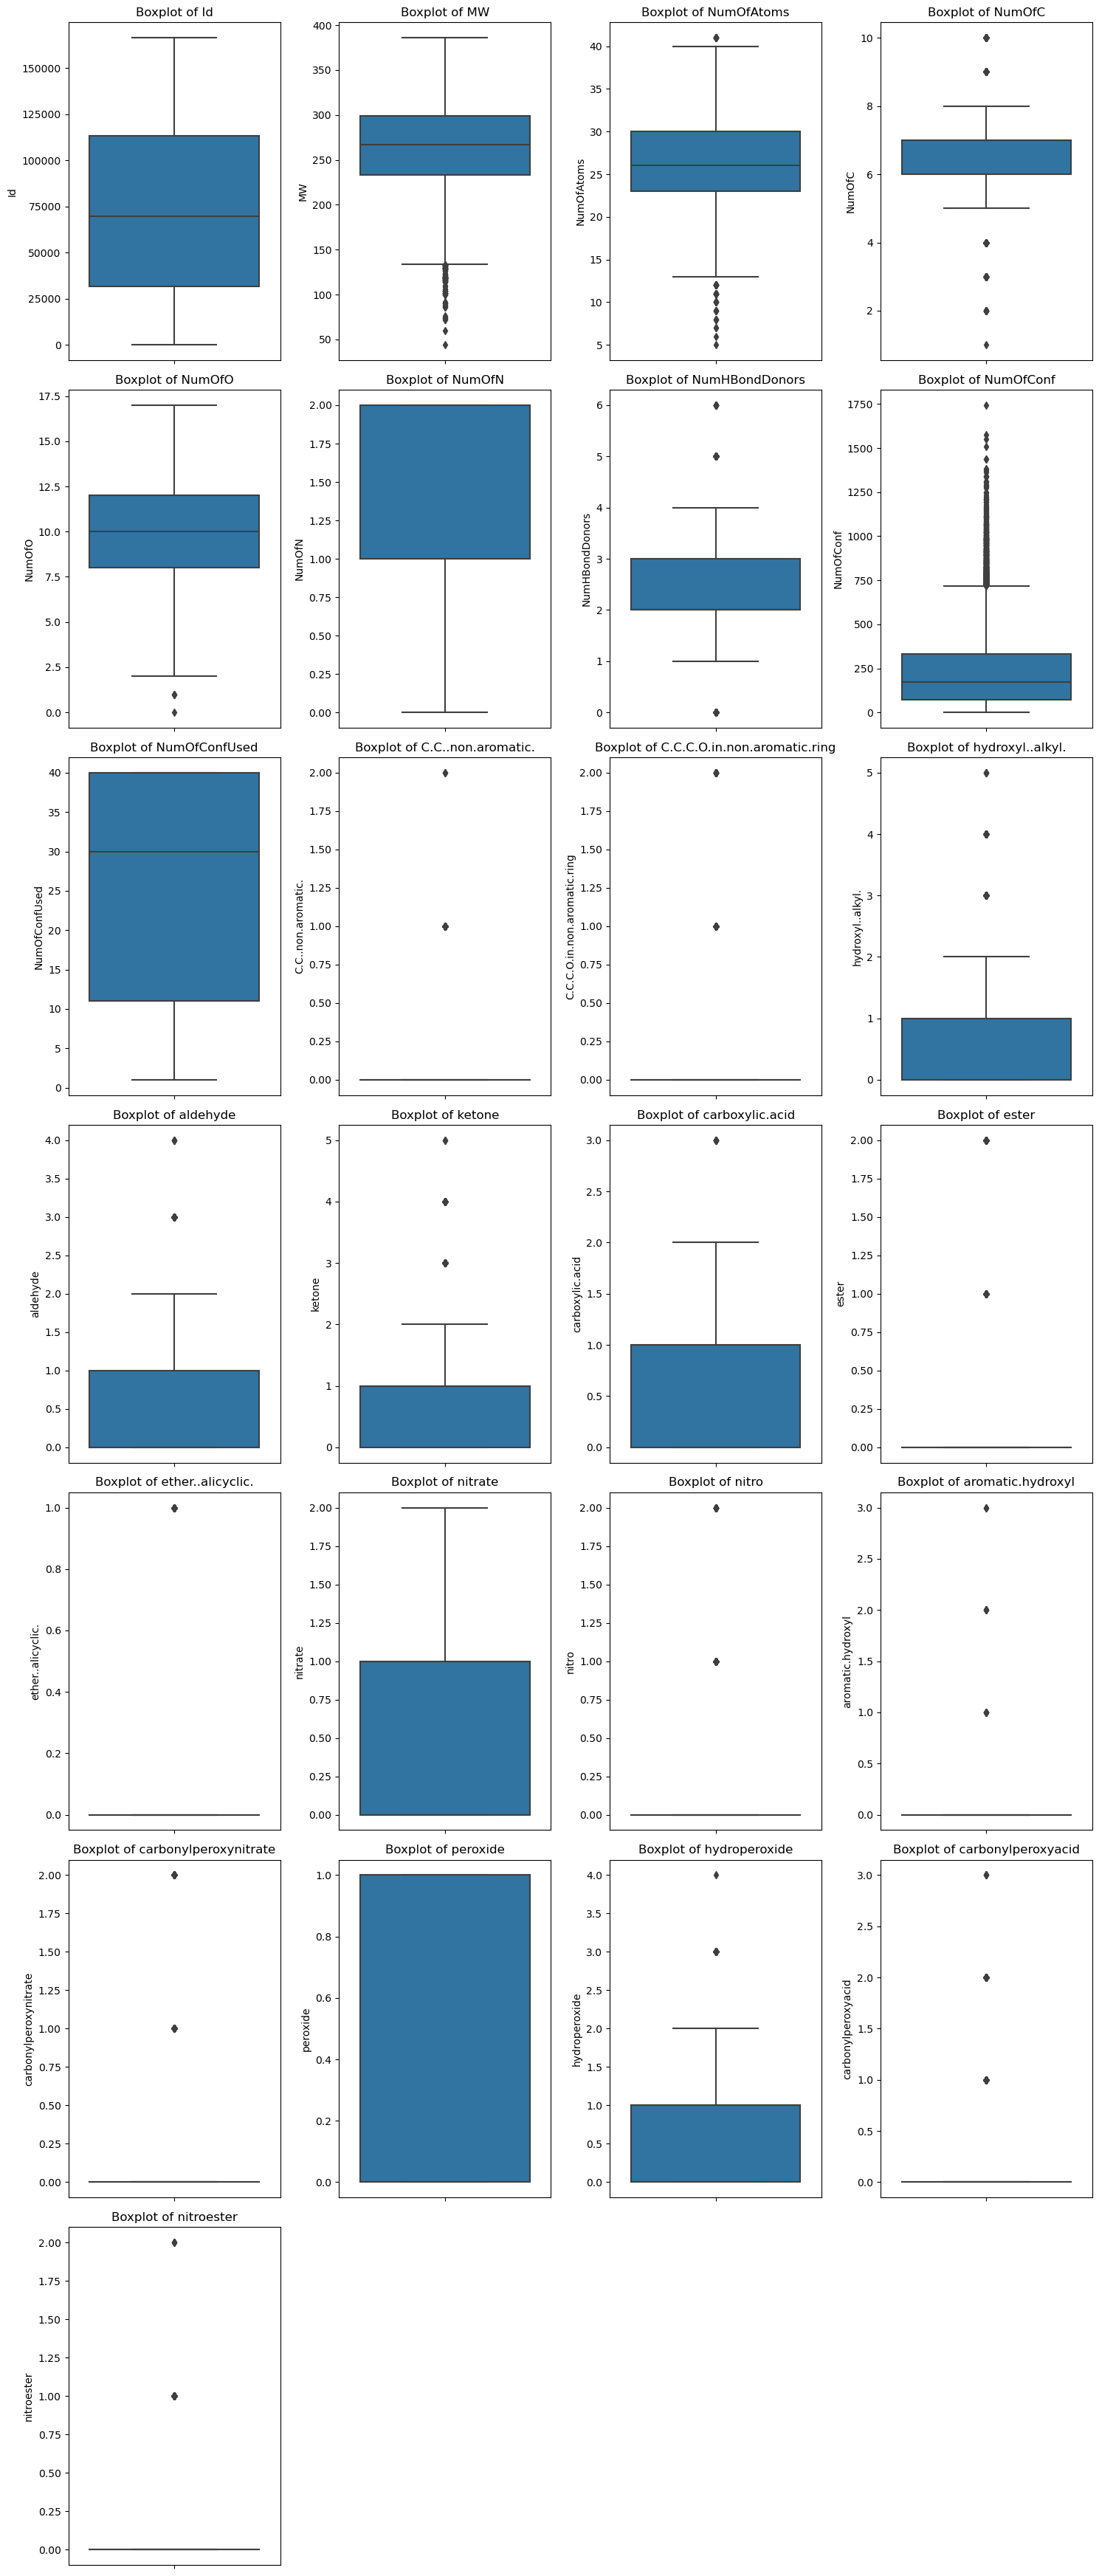

Indices that are outliers in at least 1 variables:
5782
{0, 1, 2, 3, 8, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 53, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 312, 354, 372, 387, 389, 390, 402, 405, 406, 407, 408, 410, 412, 419, 427, 431, 437, 455, 457, 458, 459, 460, 461, 464, 465, 466, 475, 478, 479, 488

In [18]:
#Check for outliers

train_numeric = train.drop("parentspecies",axis = 1)

# Assuming train is your DataFrame
num_variables = len(train_numeric.columns)
num_cols = 4  # Number of columns in the subplot grid
num_rows = (num_variables - 1) // num_cols + 1  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))

outliers_indices = {}  # Dictionary to store outlier indices for each variable
index_count = {}  # Dictionary to count occurrences of each index

# Minimum number of variables an index needs to be an outlier in
min_outlier_count = 1  # Adjust as needed

for i, column in enumerate(train_numeric.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=train_numeric[column])
    plt.title(f"Boxplot of {column}")

    # Identify outliers using Z-score
    z_scores = np.abs((train_numeric[column] - train_numeric[column].mean()) / train_numeric[column].std())
    outliers = z_scores > 3  # You can adjust the threshold as needed
    
    # Store indices of outliers in the dictionary
    outliers_indices[column] = set(train_numeric.index[outliers].tolist())
    
    # Update the index_count dictionary
    for index in outliers_indices[column]:
        index_count[index] = index_count.get(index, 0) + 1

plt.tight_layout()
plt.show()

# Filter indices that are outliers in at least min_outlier_count variables
filtered_indices = {index for index, count in index_count.items() if count >= min_outlier_count}

print(f"Indices that are outliers in at least {min_outlier_count} variables:")
print(len(filtered_indices))
print(filtered_indices)


In [19]:
#Check need for normalization

#variable_ranges = train_data.describe().loc[['min', 'max']]
variable_ranges = data_train.describe()
print("Variable Ranges:")
variable_ranges

Variable Ranges:


,Id,MW,NumOfAtoms,NumOfC,NumOfO,NumOfN,NumHBondDonors,NumOfConf,NumOfConfUsed,C.C..non.aromatic.,...,ether..alicyclic.,nitrate,nitro,aromatic.hydroxyl,carbonylperoxynitrate,peroxide,hydroperoxide,carbonylperoxyacid,nitroester,pSat_Pa
count,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,...,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,27147.000000,2.714700e+04
mean,74073.347957,264.436315,26.232843,6.860611,9.928390,1.060964,2.201643,229.643386,25.721921,0.092865,...,0.205142,0.665525,0.154050,0.001105,0.241389,0.279663,0.772977,0.259181,0.012451,5.708431e+01
std,47917.611394,49.858355,5.240883,1.451855,2.494574,0.712067,1.018979,202.905589,14.687277,0.290629,...,0.403813,0.673048,0.366171,0.047001,0.451312,0.448842,0.698533,0.467085,0.112537,5.928184e+03
min,0.000000,30.010565,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.624240e-14
25%,31724.500000,232.980781,23.000000,6.000000,8.000000,1.000000,2.000000,72.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659079e-06
50%,69861.000000,266.986260,26.000000,7.000000,10.000000,1.000000,2.000000,174.000000,30.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.552678e-04
75%,113432.000000,299.012475,30.000000,7.000000,12.000000,2.000000,3.000000,331.000000,40.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.974230e-03
max,166420.000000,386.044503,41.000000,10.000000,17.000000,2.000000,6.000000,1743.000000,40.000000,2.000000,...,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4.000000,3.000000,2.000000,7.324992e+05


In [20]:
#Normalize training variables

train_numeric_no_target = train_numeric.drop("pSat_Pa",axis = 1)

#This function performs z_score normalization to a dataset
def normalize_dataset(dataset):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(dataset)
    normalized_df = pd.DataFrame(normalized_data, columns=dataset.columns)
    return normalized_df

a = normalize_dataset(train_numeric_no_target)
a.describe()

KeyError: "['pSat_Pa'] not found in axis"